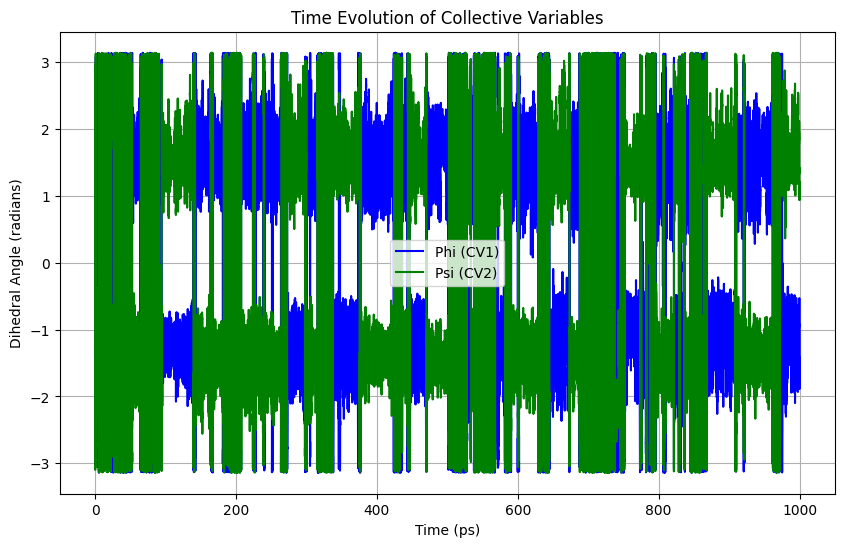

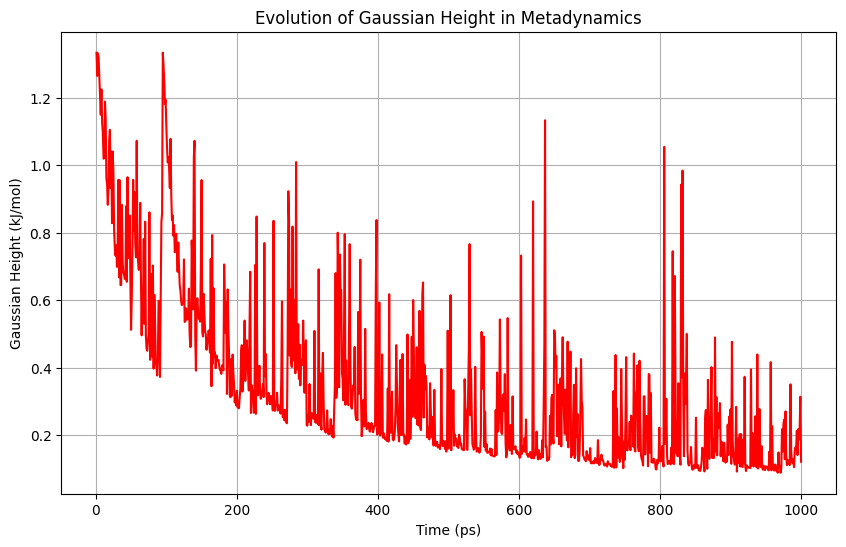

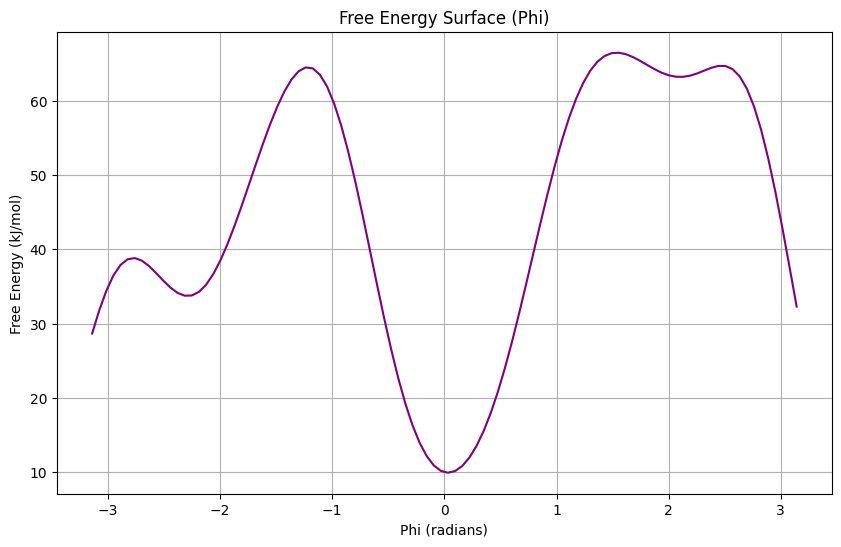

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义文件路径
colvar_file = "/mnt/d/QM_E/Week6-Metadynamics/Inputs/COLVAR"
hills_file = "/mnt/d/QM_E/Week6-Metadynamics/Inputs/HILLS"

# 读取 COLVAR 文件，跳过以 # 开头的行（注释）
colvar_data = pd.read_csv(colvar_file, delim_whitespace=True, comment='#', header=None)
colvar_data.columns = ["Time", "Phi", "Psi", "Bias"]

# 读取 HILLS 文件，跳过以 # 开头的行（注释）
hills_data = pd.read_csv(hills_file, delim_whitespace=True, comment='#', header=None)
hills_data.columns = ["Time", "Phi", "Sigma_Phi", "Height", "Bias_Factor"]

# 绘制 COLVAR 中 Phi 角随时间的变化
plt.figure(figsize=(10, 6))
plt.plot(colvar_data["Time"], colvar_data["Phi"], label="Phi (CV1)", color="blue")
plt.plot(colvar_data["Time"], colvar_data["Psi"], label="Psi (CV2)", color="green")
plt.xlabel("Time (ps)")
plt.ylabel("Dihedral Angle (radians)")
plt.title("Time Evolution of Collective Variables")
plt.legend()
plt.grid(True)
plt.show()

# 绘制 HILLS 文件中的高斯势变化
plt.figure(figsize=(10, 6))
plt.plot(hills_data["Time"], hills_data["Height"], label="Gaussian Height", color="red")
plt.xlabel("Time (ps)")
plt.ylabel("Gaussian Height (kJ/mol)")
plt.title("Evolution of Gaussian Height in Metadynamics")
plt.grid(True)
plt.show()

# 使用sum_hills方法生成自由能曲线
def calculate_free_energy(hills_data, bin_num=100, phi_min=-np.pi, phi_max=np.pi):
    # 创建phi区间的网格
    phi_bins = np.linspace(phi_min, phi_max, bin_num)
    free_energy = np.zeros_like(phi_bins)

    # 累加HILLS中高斯核来计算自由能
    for i, row in hills_data.iterrows():
        phi_value = row["Phi"]
        height = row["Height"]
        sigma = row["Sigma_Phi"]
        
        # 将高斯核加到每个phi_bin上
        gaussian = np.exp(-0.5 * ((phi_bins - phi_value) / sigma) ** 2)
        free_energy += height * gaussian

    return phi_bins, free_energy

# 计算自由能
phi_bins, free_energy = calculate_free_energy(hills_data)

# 读取 HILLS 文件
hills_file = "/mnt/d/QM_E/Week6-Metadynamics/Inputs/HILLS"
hills_data = pd.read_csv(hills_file, delim_whitespace=True, comment='#', header=None)
hills_data.columns = ["Time", "Phi", "Sigma_Phi", "Height", "Bias_Factor"]

# 定义绘制自由能的函数，基于单变量Phi
def calculate_free_energy_phi(hills_data, bin_num=100, phi_min=-np.pi, phi_max=np.pi):
    # 创建phi区间的网格
    phi_bins = np.linspace(phi_min, phi_max, bin_num)
    free_energy = np.zeros_like(phi_bins)

    # 累加HILLS中高斯核来计算自由能
    for i, row in hills_data.iterrows():
        phi_value = row["Phi"]
        height = row["Height"]
        sigma_phi = row["Sigma_Phi"]

        # 将高斯核加到每个phi_bin上
        gaussian = np.exp(-0.5 * ((phi_bins - phi_value) / sigma_phi) ** 2)
        free_energy += height * gaussian

    return phi_bins, free_energy

# 计算基于Phi的自由能
phi_bins, free_energy = calculate_free_energy_phi(hills_data)

# 绘制自由能曲线
plt.figure(figsize=(10, 6))
plt.plot(phi_bins, free_energy, label="Free Energy (Phi)", color="purple")
plt.xlabel("Phi (radians)")
plt.ylabel("Free Energy (kJ/mol)")
plt.title("Free Energy Surface (Phi)")
plt.grid(True)
plt.show()